In [61]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sns.set(style = 'whitegrid', font_scale = 1.2, rc = {'figure.figsize':(30, 10)})
data = pd.read_excel('../Lab2/Absenteeism_at_work_AAA/Absenteeism_at_work.xls')
selected_features = ['Son', 'Education', 'Reason for absence', 'Service time', 'Age', 'Absenteeism time in hours', 'Body mass index', 'Distance from Residence to Work', 'Transportation expense', 'Disciplinary failure']
data = data[selected_features]
data['Service time'] = data['Service time'].apply(lambda x: float(x))
data['Age'] = data['Age'].apply(lambda x: float(x))
data['Absenteeism time in hours'] = data['Absenteeism time in hours'].apply(lambda x: float(x))
data['Body mass index'] = data['Body mass index'].apply(lambda x: float(x))
data['Distance from Residence to Work'] = data['Distance from Residence to Work'].apply(lambda x: float(x))
data['Transportation expense'] = data['Transportation expense'].apply(lambda x: float(x))
X = data.drop(['Reason for absence', 'Absenteeism time in hours', 'Age'], axis=1) #predictors
Y = data[['Reason for absence', 'Absenteeism time in hours', 'Age']] #target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
data.head()

,Son,Education,Reason for absence,Service time,Age,Absenteeism time in hours,Body mass index,Distance from Residence to Work,Transportation expense,Disciplinary failure
0,2,1,26,13.0,33.0,4.0,30.0,36.0,289.0,0
1,1,1,0,18.0,50.0,0.0,31.0,13.0,118.0,1
2,0,1,23,18.0,38.0,2.0,31.0,51.0,179.0,0
3,2,1,7,14.0,39.0,4.0,24.0,5.0,279.0,0
4,2,1,23,13.0,33.0,2.0,30.0,36.0,289.0,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

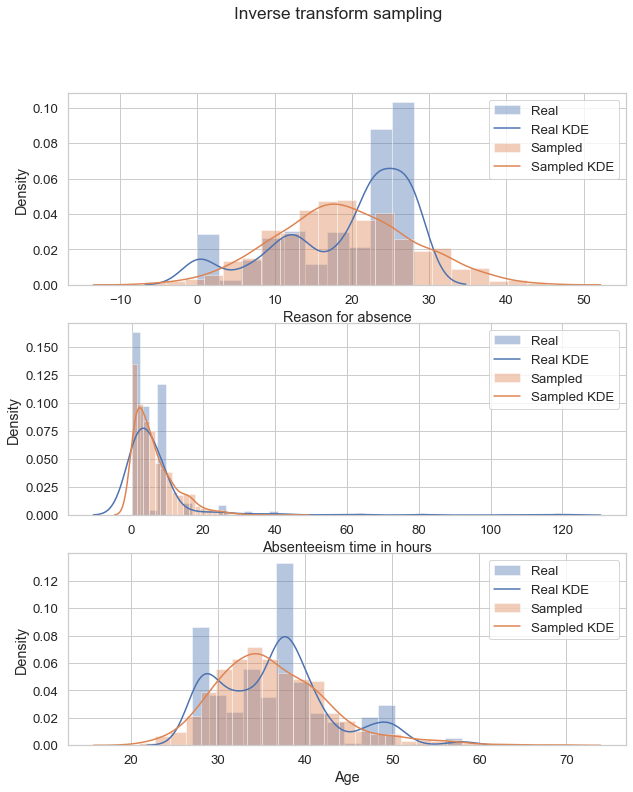

In [60]:
def inverse_transform_sampling(n, dist, param):
    gen = np.random.uniform(size=n)
    rv = dist(*param)
    return rv.ppf(gen)

fig, (ax0, ax1, ax2) = plt.subplots(len(Y.columns), 1, figsize=(10, 12))

fig.suptitle('Inverse transform sampling')
ax0.set_ylabel('Density')

params_rfa = st.exponnorm.fit(data['Reason for absence'])
sampled_rfa = inverse_transform_sampling(740, st.exponnorm, params_rfa)

sns.distplot(data['Reason for absence'], kde=True, ax=ax0, label='initial data',)
sns.distplot(sampled_rfa, kde=True, norm_hist=True, ax=ax0, label='sampled data')
ax0.legend(["Real", "Real KDE", "Sampled", "Sampled KDE"])

params_at = st.exponnorm.fit(data['Absenteeism time in hours'])
sampled_at = inverse_transform_sampling(740, st.exponnorm, params_at)

sns.distplot(data['Absenteeism time in hours'], kde=True, ax=ax1, label='initial data',)
sns.distplot(sampled_at, kde=True, norm_hist=True, ax=ax1, label='sampled data')
ax1.legend(["Real", "Real KDE", "Sampled", "Sampled KDE"])

params_age = st.exponnorm.fit(data['Age'])
sampled_age = inverse_transform_sampling(740, st.exponnorm, params_age)

sns.distplot(data['Age'], kde=True, ax=ax2, label='initial data',)
sns.distplot(sampled_age, kde=True, norm_hist=True, ax=ax2, label='sampled data')
ax2.legend(["Real", "Real KDE", "Sampled", "Sampled KDE"])